# configuration file testing and setup

In [ ]:
import new_cfg
import ConfigParser
config = ConfigParser.ConfigParser()
import sys

In [ ]:
reload(new_cfg)
rc_fh = new_cfg.new_rc()

In [ ]:
config.read(rc_fh)
for sec in config.sections():
    print '[' + sec + ']'
    for item in config.items(sec):
        print item[0], '=', item[1]
    print ''

# skysearch_lib testing

In [ ]:
import skysearch_lib as ss_lib
import ConfigParser
#import ConfigParser

In [ ]:
config = ConfigParser.ConfigParser()
config.read(ss_lib.sortout_rcfile())
for sec in config.sections():
    print '[' + sec + ']'
    for item in config.items(sec):
        print item[0], '=', item[1]
    print ''

# file system support testing

In [ ]:
import os

In [ ]:
# string path to this (current) directory
curdir_path = os.path.abspath(os.path.curdir)

In [ ]:
# parent directory path and current directory name
pardir_path, curdir_name = os.path.split(curdir_path)

In [ ]:
# parent directory name
pardir_name = os.path.split(pardir_path)[1]

In [ ]:
# list of files in this directory with .cfg ext
[f for f in os.listdir(os.path.abspath(os.path.curdir)) if os.path.splitext(f)[1] == '.cfg']

In [ ]:
dmpc = '4.0'
filter_type = 'h158'
halo ='halo02'
file_type = 'grid'
ext = 'npy'

In [ ]:
'_'.join([halo, dmpc, filter_type, file_type]) + os.path.extsep + ext

In [ ]:
try:
    '_'.join([halo, dmpc, filter_type])#, file_type])
except NameError as e:
    print type(e[0])

# annuluar and radial segment limits

In [ ]:
np.pi

In [3]:
alims = np.nonzero(
    np.logical_and(
        np.logical_and(
            grid[:, :, 5] >=  0.0,
            grid[:, :, 5] <=  np.pi/32.0),
        np.logical_and(
            grid[:, :, 4] >= 200,
            grid[:, :, 4] < 250)))

tlims = np.nonzero(
    np.logical_and(
        np.logical_and(
            table['Phi'] >=  0.0,
            table['Phi'] <=  np.pi/32.0),
        np.logical_and(
            table['Rads'] >= 200,
            table['Rads'] < 250)))

fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(121)

ax1.pcolormesh(np.log10(grid[:,:,0]), vmin=0, vmax=3.5)

ax1.set_xlim([0, 600])
ax1.set_ylim([0, 600])

ax2 = fig.add_subplot(122, projection='polar')
ax2.scatter(table['Phi'][tlims], table['Rads'][tlims], s=5, alpha=.05, marker='.')
ax2.set_thetagrids(np.linspace(0.0, 360.0, 32)[:-1])
ax2.set_ylim([0, 300])
ax2.set_theta_direction(-1)
ax2.set_theta_zero_location("N")
plt.show()
plt.show()

NameError: name 'table' is not defined

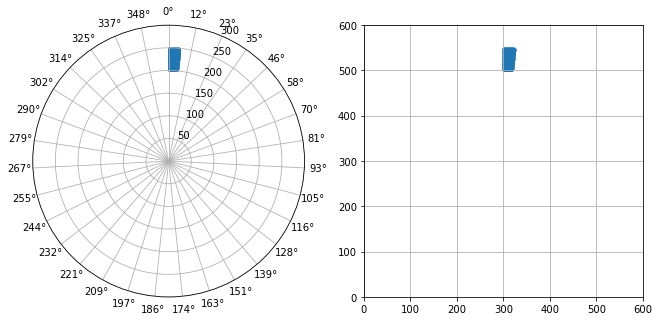

In [4]:
fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(121, projection='polar')

#ax1.scatter(-table['Phi'][::10], table['Rads'][::10], s=5, alpha=.05, marker='.')
#for i in np.linspace(deg_0, deg_1, 360, retstep=True, dtype=np.float16):
#ax1.scatter(i, i * 0.5 * 1e2, s=100, alpha=1)
#ax1.bar(left + 0.5 * width, height, width=0.8, bottom=None, *, data=None, **kwargs)
#ax1.bar(0.5 * np.pi/32, 50, width=np.pi/32, bottom=200, alpha=.2)

ax1.scatter(np.arctan2(alims[1] - 300, alims[0] - 300), np.sqrt(np.square(alims[0] - 300) + np.square(alims[1] - 300)), s=1)
ax1.set_thetagrids(np.linspace(0.0, 360.0, 32)[:-1])
ax1.set_ylim([0, 300])
ax1.set_theta_direction(-1)
ax1.set_theta_zero_location("N")

ax2 = fig.add_subplot(122)
ax2.scatter(alims[1], alims[0], s=1)
ax2.set_xlim([0, 600])
ax2.set_ylim([0, 600])
ax2.axes.grid()


plt.show()

In [ ]:
def test_plot():
    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(111, projection='polar')
    ax1.set_thetagrids(np.linspace(0.0, 360.0, 32)[:-1])
    ax1.set_title(halo)
    ax1.set_ylim([0, 300])
    ax1.set_theta_direction(-1)
    ax1.set_theta_zero_location("N")
    
    return ax1
    


In [2]:
import numpy as np
import skysearch_lib as ss_lib
from matplotlib import pyplot as plt
from astropy.table import Table
import sys
import os
import skysurvey

def fix_rslice(grid, r=4):
    phi_slice = np.zeros((601, 601, 1))
    grid = np.concatenate((grid, phi_slice), axis=2)

    center = 300
    grid = grid
    for i in range(grid.shape[0]):
        for q in range(grid.shape[1]):
            value = np.sqrt(np.square(i - center) + np.square(q - center))
            grid[i, q, r] = value
            grid[i, q, 5] = np.arctan2(q - 300, i - 300)
    return grid



# Load halo grid into mem
grid_dir_path = os.path.join(skysurvey.grid_dir, '601')
grids = [fh for fh in os.listdir(grid_dir_path) if fh.endswith('npy')]
fh = grids[3]
grid_fh = os.path.join(grid_dir_path, fh)
_grd = np.load(grid_fh)
grid = fix_rslice(_grd)
halo = fh.split('_')[0]
print halo


# params 
r_0 = 80
r_1 = 300
r_step = 1
r_scale = 0.075
deg_0 = -np.pi
deg_1 = np.pi
deg_step = 360

# make the arrays
radii = range(r_0, r_1, r_step)
annulii, annulus_step = np.linspace(deg_0, deg_1, deg_step, retstep=True, dtype=np.float16) 

# make an output table
output_colums = ['radius', 'r0', 'r1', 'halo', 'xbox_cut',
                 'xbox_min', 'xbox_mean', 'xbox_max', 
                 'extent', 'sat_purity', 'n_stars', 'n_boxes', 
                 'domsat', 'name1', 'name2']
output_dtyps = ['f', 'f', 'f', 'S10', 'f',
                 'f', 'f', 'f', 
                 'f', 'f', 'i', 'i', 
                 'i', 'f', 'f']

halo08


In [ ]:
min_extent = 3

In [ ]:
record_table = Table(names=output_colums, dtype=output_dtyps)
for fh in grids:
    
    fh = grids[3]
    
    grid_fh = os.path.join(grid_dir_path, fh)
    _grd = np.load(grid_fh)
    grid = fix_rslice(_grd)
    halo = fh.split('_')[0]
  
    table_fh = os.path.join(skysurvey.table_dir, 'merged_tables', halo + '.hdf5')
    table = Table.read(table_fh, format='hdf5', path='data')

    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(111, projection='polar')
    
    ax1.scatter(table['Phi'][::10], table['Rads'][::10], s=10, alpha=.075, marker='.')
    ax1.set_thetagrids(np.linspace(0.0, 360.0, 32)[:-1])
    ax1.set_title(halo)
    ax1.set_ylim([0, 300])
    ax1.set_theta_direction(-1)
    ax1.set_theta_zero_location("N")
    fig.savefig('../data/plots/' + halo + '_fullplot.png')
    plt.close()
    ax1 = fig.add_subplot(111, projection='polar')
    ax1.set_thetagrids(np.linspace(0.0, 360.0, 32)[:-1])
    ax1.set_title(halo)
    ax1.set_ylim([0, 300])
    ax1.set_theta_direction(-1)
    ax1.set_theta_zero_location("N")
    
    for r in radii:

        annulus_scale = r * r_scale
        r_strt = r - annulus_scale
        r_stop = r + annulus_scale

        grid_idx = np.logical_and(
                grid[:, :, 4] >= r_strt,
                grid[:, :, 4] < r_stop)

        mu = round(grid[:, :, 0][np.nonzero(grid_idx)].mean(), 4)
        xbox_min = 5.0 / np.sqrt(mu)

        one_before = False
        run_length = 0

        for _deg0 in annulii:

            _deg1 = _deg0 + annulus_step
            alims = np.nonzero(
                np.logical_and(
                    np.logical_and(
                        grid[:, :, 5] >= _deg0,
                        grid[:, :, 5] < _deg1),
                    grid_idx))

            xbox = ((grid[:, :, 0][alims] - mu) / mu)

            if len(xbox) and xbox.mean() > xbox_min:

                if not one_before:

                    xbmin = [xbox.min()]
                    xbmean = [xbox.mean()]
                    xbmax = [xbox.max()]

                    run_length = 0
                    starting_deg = _deg0

                else:

                    xbmin.append(xbox.min())
                    xbmean.append(xbox.mean())
                    xbmax.append(xbox.max())
                
                run_length += 1
                one_before = True

            else:

                if one_before:
                    
                    if run_length > min_extent:
                        _extent = _deg1 - starting_deg
                        row = [r, r_strt, r_stop, halo, xbox_min,
                               np.asarray(xbmin).mean(),
                               np.asarray(xbmean).mean(),
                               np.asarray(xbmax).mean(),
                               _extent,
                               0.0, grid[:, :, 0][alims].sum(),
                               len(alims[0]), 0,  0.0,  0.0]
                        record_table.add_row(row)
                        #print record_table
                        ax1.bar(_deg1 - (0.5 * _extent), (r_stop - r_strt), _extent, bottom=r_strt, alpha=.3)
                        #ax1.scatter(np.deg2rad((_deg1 - (0.5 * (_deg1 - starting_deg)) - 180.0)), r, s=100, alpha=1)
                        fig.savefig('../data/plots/' + halo + '_discovey.png')

                    
                one_before = False
                run_length = 0
                starting_deg = 0

            m0 = str(r) + ' ' + fh + '   '
            m1 = _deg0
            m2 = '  '
            m3 = str(one_before) + '   '
            sys.stdout.write('\r' + str(m0) + 'Kpc  ' +
                             str(m1) + ' deg  ' + m2 + m3)
            sys.stdout.flush()

    plt.close()

In [ ]:
table.pprint()

## - feature finding

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

ax.pcolormesh(np.log10(grid[8:, :, 0].T), cmap=plt.cm.bone_r, vmin=0.0, vmax=3.6)
ax.set_xlim([200, 400])
ax.set_ylim([200, 400])
ax.axes.grid()

plt.show()

In [ ]:
record_table.write('./output.hdf5', format='hdf5', path='data')

In [ ]:
record_table = Table.read('./output.hdf5', format='hdf5', path='data')

In [6]:
# Load halo table into mem
table_number = 0
table_dir_path = os.path.join(skysurvey.table_dir, 'merged_tables')
tables = [fh for fh in os.listdir(table_dir_path) if fh.endswith('hdf5')]
table_fh = os.path.join(table_dir_path, tables[table_number])
table = Table.read(table_fh, format='hdf5', path='data')
print table.meta['halo']

halo02


In [7]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

ax.scatter(_x, _y, s=10, alpha=.15, marker='.', cmap=plt.cm.Paired, c=_c, vmin=1.0, vmax=10.0)

ax.set_title(table.meta['halo'])
ax.set_xlim([0, 600])
ax.set_ylim([0, 600])
ax.axes.grid()

plt.show()

NameError: name '_x' is not defined

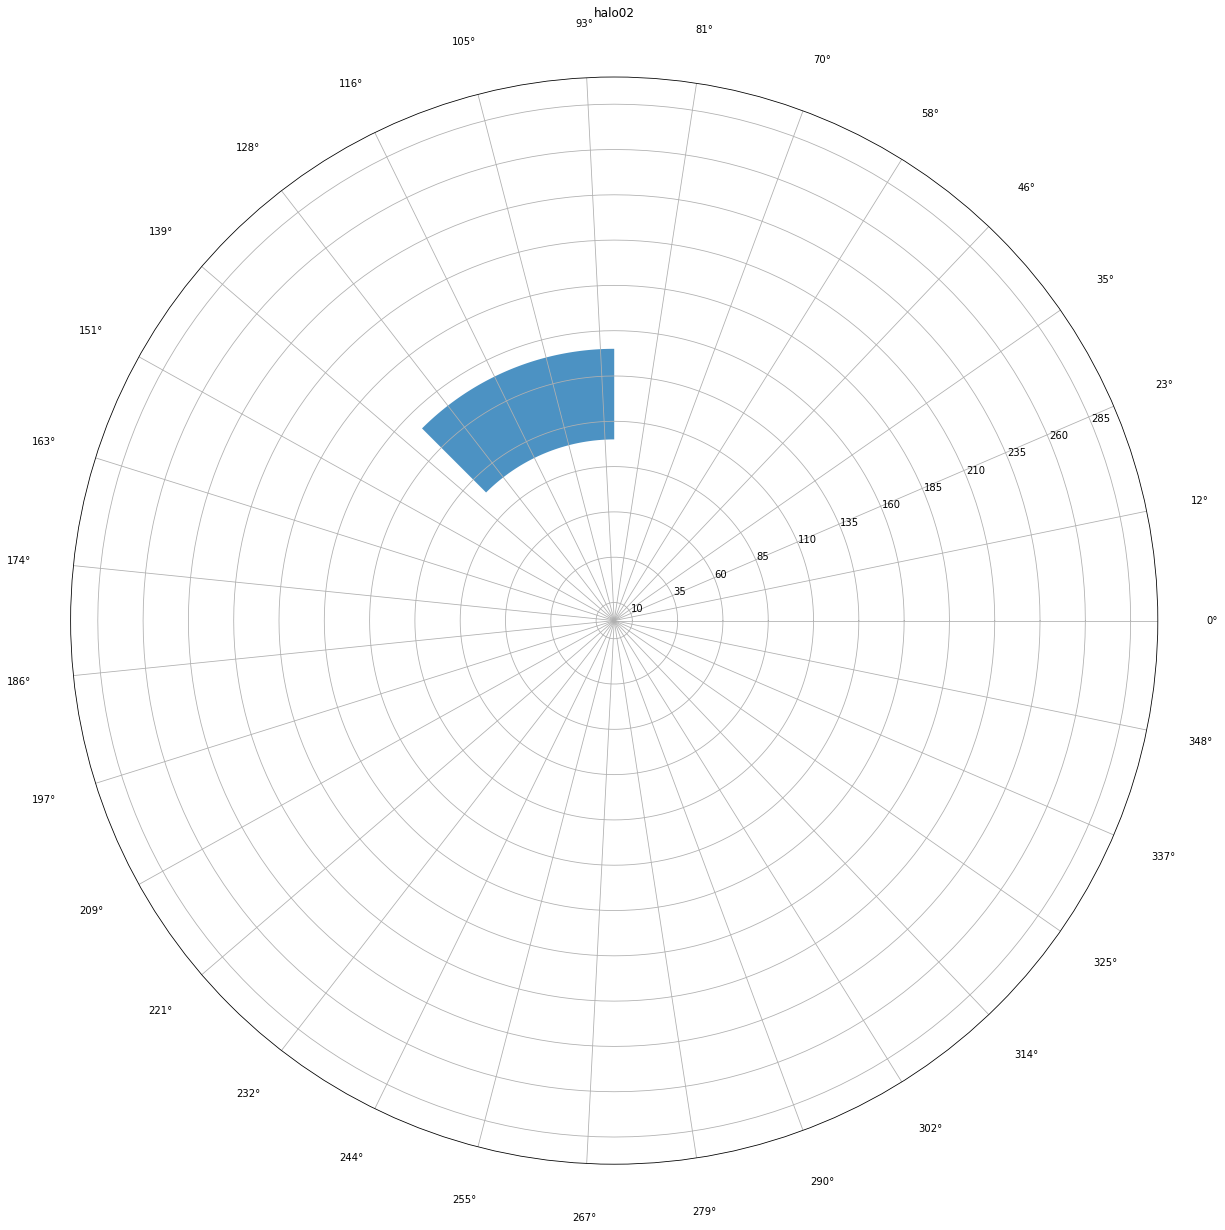

In [19]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='polar')

#_x = table['Rads'][::100]
#_y = table['Phi'][::100]
#_c = table['Xbox'][::100]
#ax.scatter(_y, _x, s=10, alpha=.15, marker='.', cmap=plt.cm.Paired, c=_c, vmin=1.0, vmax=10.0)
#_ax.bar(theta0, r_extent, angular_extent, r_start, alpha=.2)
theta0 = np.pi/2
angular_extent = np.pi/4
ax.bar(theta0 + (0.5 * angular_extent), 50, angular_extent, 100, alpha=.8)

ax.set_thetagrids(np.linspace(0.0, 360.0, 32)[:-1])
ax.set_rgrids(range(10, 300, 25))
ax.set_title(table.meta['halo'])
ax.set_ylim([0, 300])

plt.show()

In [22]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [34]:
colors = mcolors.cnames.keys()
colors *= 15
len(colors)

2220

In [28]:
sadis = range(0, 1500)

In [ ]:
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for x,y in cur_set:
    ax.scatter(x, y, s=10, alpha=.15, marker='.', color='red')

ax.set_xlim([175, 425])
ax.set_ylim(ax.get_xlim())
ax.axes.grid()

plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(rlims[1], rlims[0], s=10, alpha=.15, marker='.')
ax.scatter(alims[1], alims[0], s=10, alpha=.15, marker='.', color='red')

ax.set_title(table.meta['halo'])
ax.set_xlim([225, 375])
ax.set_ylim(ax.get_xlim())
ax.axes.grid()

plt.show()

In [ ]:
annuli_step

In [ ]:
len(idx[0])

In [ ]:
import skysearch_lib as sslib
annuli, annuli_step = ss_lib.annuli()

In [ ]:
for r, r_start, r_stop in sslib.radii():
    mu, r_idx = sslib.mu_idx(grid, r_start, r_stop)
    for _deg0, _deg1 in annuli:
        idx = np.nonzero(
            np.logical_and(
                np.logical_and(
                    grid[:, :, 5] >= _deg0,
                    grid[:, :, 5] < _deg1),
                np.logical_and(
                    grid[:, :, 4] >= r_start,
                    grid[:, :, 4] < r_stop)))
        if len(idx[0]):
            print r,_deg0, _deg1

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(grid_idx[1], grid_idx[0], s=10, alpha=.15, marker='.')

ax.set_title(table.meta['halo'])
#ax.set_xlim([225, 375])
#ax.set_ylim(ax.get_xlim())
ax.axes.grid()

plt.show()

In [ ]:
r_strt = 125 - (125 * .1)
r_stop = 125 + (125 * .1)

In [ ]:
for _deg in [annulii[287]]:
    _deg0 = _deg
    _deg1 = _deg + annulus_step

## get the search grid setup

In [ ]:
rlims = np.nonzero(
    np.logical_and(
        table['Rads'] >= _r_strt, 
        table['Rads'] < _r_stop))

alims = np.nonzero(
    np.logical_and(
        np.logical_and(
            table['Phi'] >= _deg0 ,
            table['Phi'] < _deg1),
        np.logical_and(
            table['Rads'] >= _r_strt, 
            table['Rads'] < _r_stop)))

In [ ]:
table[alims]['Rads'].max()

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

ax.scatter(table[rlims]['Phi'], table[rlims]['Xbox'], s=.5)

ax.vlines((_deg0, _deg1), -1e3, 1e3, color='orangered', alpha=.5, linestyle='dashed')
ax.hlines(mu,-1e3, 1e3,color='red', alpha=.5, linestyle='dashed')
ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([table[rlims]['Xbox'].min() + .5, table[rlims]['Xbox'].max()])
ax.axes.grid()

plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)


x_axis = grid[:, :, 5][grid_idx]

xbox = ((grid[:, :, 0][grid_idx] - mu) / mu)

ax.scatter(x_axis, xbox, s=.5)

ax.vlines((_deg0, _deg1), -1e3, 1e3, color='orangered', alpha=.5, linestyle='dashed')
ax.hlines(mu,-1e3, 1e3,color='red', alpha=.5, linestyle='dashed')
ax.set_xlim([0, 360])
ax.set_ylim([xbox.min() , xbox.max()/4.0])
ax.axes.grid()

plt.show()

In [ ]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

In [ ]:
[1,2,3,4].max()

In [ ]:
import matplotlib.animation as animation

In [ ]:
animation.FuncAnimation()